<a href="https://colab.research.google.com/github/sunaina5/Project2024_EDA/blob/main/Anomaly_driven_Exploratory_Data_Analysis_(2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [138]:
df = pd.read_excel("/content/EDA_PROJECT_DATASET.xlsx")

In [139]:
df.head(5)

,ID,Name,Date_of_Birth,Avg_Salary,Nationality,Address,Zip_Code,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Numer_of_Child,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network
0,1,Mr. John Doe,1980-05-20,40520.0,American,"123, NY",141106.0,500.52020,s,Bachelor's,M,Engineer,2.0,John@gmail.coM,A+,2 Crore,740,Yes,FaceBook
1,2,Miss Jane Smith,1995-11-30,50000.0,American,"456, CA",142015.0,652.54200,m,Master's,M,Doctor,0.0,jane@gmail.com,O-,5 Crore,780,No,Instagram
2,3,Mr. Michael Johnson,1972-07-28,800000.0,Indian,"789, TX",542145.0,410.14254,s,Phd,M,Engineer,1.0,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook
3,4,Miss Emily Brown,1990-03-15,75000.0,Australian,"101, FL",NaN,201.87500,l,Master's,F,Teacher,0.0,emily@gmail.com,B-,50 Lakh,400+,No,Instagram
4,5,David Williams,1987-02-25,NaN,German,"202, WA",NaN,521.54200,xl,Master's,F,Businessman,1.0,david@gmail.com,O+,10000,0,No,Instagram


In [140]:
df.describe()

,ID,Avg_Salary,Zip_Code,Monthly_Spending( USD),Numer_of_Child
count,974.000000,9.540000e+02,2.550000e+02,935.000000,33.000000
mean,487.500000,2.887008e+05,7.402771e+05,-738.395561,0.454545
std,281.313882,3.298318e+05,2.473222e+06,11065.059309,0.869300
min,1.000000,0.000000e+00,0.000000e+00,-56407.635164,0.000000
25%,244.250000,6.414835e+04,4.126500e+04,296.333263,0.000000
50%,487.500000,1.387000e+05,2.223790e+05,362.709477,0.000000
75%,730.750000,4.000000e+05,7.147950e+05,411.090204,1.000000
max,974.000000,1.585200e+06,2.104366e+07,100020.000000,3.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        974 non-null    int64         
 1   Name                      951 non-null    object        
 2   Date_of_Birth             946 non-null    datetime64[ns]
 3   Avg_Salary                954 non-null    float64       
 4   Nationality               959 non-null    object        
 5   Address                   963 non-null    object        
 6   Zip_Code                  255 non-null    float64       
 7   Monthly_Spending( USD)    935 non-null    float64       
 8   Size_fit                  974 non-null    object        
 9   Education                 974 non-null    object        
 10  Gender                    955 non-null    object        
 11  Occupation                949 non-null    object        
 12  Numer_of_Child        

In [142]:
df.isnull().sum()

ID                            0
Name                         23
Date_of_Birth                28
Avg_Salary                   20
Nationality                  15
Address                      11
Zip_Code                    719
Monthly_Spending( USD)       39
Size_fit                      0
Education                     0
Gender                       19
Occupation                   25
Numer_of_Child              941
Email_Address                33
Blood_Type                    0
Property_Value                0
Credit_Score                  0
Smoking_Habit                 0
Preferred_Social_Network      0
dtype: int64

In [143]:
df.isnull().sum().sum()

1873

In [144]:
df.shape

(974, 19)

In [145]:
df.isnull().sum().sum()/df.shape[0]*df.shape[1]

36.53696098562628

We cannot drop all the null values because null values are 42.5% present in the data. we can't neglect half of the data. some will fill  by fillna some will drop by dropna.

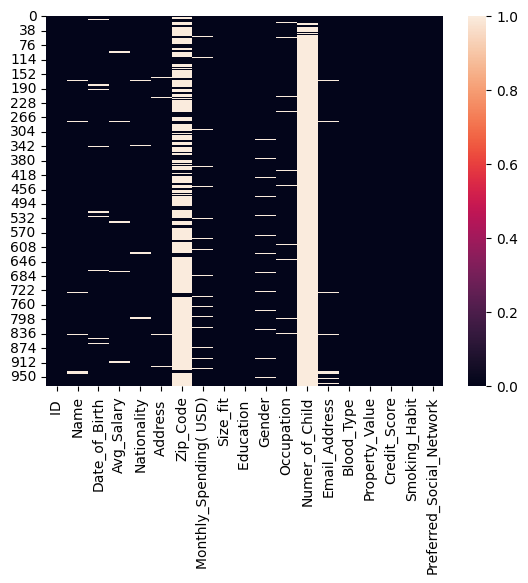

In [146]:
sns.heatmap(df.isnull())
plt.show()

In [147]:
df.drop(columns=['Numer_of_Child'], inplace = True)

In [148]:
df.head(5)

,ID,Name,Date_of_Birth,Avg_Salary,Nationality,Address,Zip_Code,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network
0,1,Mr. John Doe,1980-05-20,40520.0,American,"123, NY",141106.0,500.52020,s,Bachelor's,M,Engineer,John@gmail.coM,A+,2 Crore,740,Yes,FaceBook
1,2,Miss Jane Smith,1995-11-30,50000.0,American,"456, CA",142015.0,652.54200,m,Master's,M,Doctor,jane@gmail.com,O-,5 Crore,780,No,Instagram
2,3,Mr. Michael Johnson,1972-07-28,800000.0,Indian,"789, TX",542145.0,410.14254,s,Phd,M,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook
3,4,Miss Emily Brown,1990-03-15,75000.0,Australian,"101, FL",NaN,201.87500,l,Master's,F,Teacher,emily@gmail.com,B-,50 Lakh,400+,No,Instagram
4,5,David Williams,1987-02-25,NaN,German,"202, WA",NaN,521.54200,xl,Master's,F,Businessman,david@gmail.com,O+,10000,0,No,Instagram


In [149]:
df.drop(columns=['Zip_Code'], inplace = True)

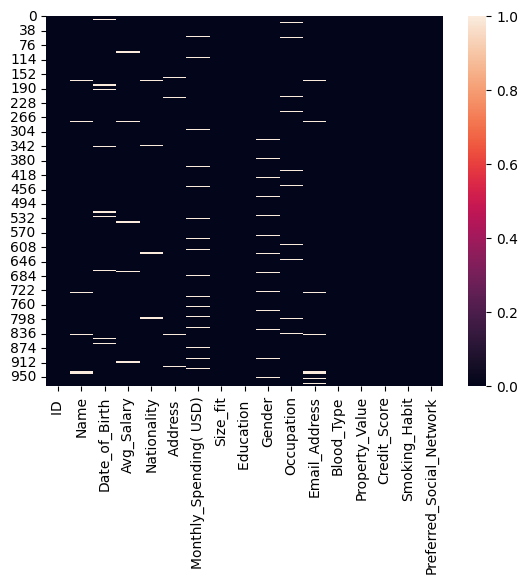

In [150]:
sns.heatmap(df.isnull())
plt.show()

#Let's clean data column wise!!

**COLUMN 1 - NAME**


In [151]:
split_surname = df['Name'].str.split(" ",expand = True)
df['surname']= split_surname[0]
df['Name']= split_surname[1]

In [152]:
df.head(3)

,ID,Name,Date_of_Birth,Avg_Salary,Nationality,Address,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,surname
0,1,John,1980-05-20,40520.0,American,"123, NY",500.52020,s,Bachelor's,M,Engineer,John@gmail.coM,A+,2 Crore,740,Yes,FaceBook,Mr.
1,2,Jane,1995-11-30,50000.0,American,"456, CA",652.54200,m,Master's,M,Doctor,jane@gmail.com,O-,5 Crore,780,No,Instagram,Miss
2,3,Michael,1972-07-28,800000.0,Indian,"789, TX",410.14254,s,Phd,M,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,Mr.


In [153]:
df.drop(columns = ['surname'], inplace = True)

In [154]:
df.head(3)

,ID,Name,Date_of_Birth,Avg_Salary,Nationality,Address,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network
0,1,John,1980-05-20,40520.0,American,"123, NY",500.52020,s,Bachelor's,M,Engineer,John@gmail.coM,A+,2 Crore,740,Yes,FaceBook
1,2,Jane,1995-11-30,50000.0,American,"456, CA",652.54200,m,Master's,M,Doctor,jane@gmail.com,O-,5 Crore,780,No,Instagram
2,3,Michael,1972-07-28,800000.0,Indian,"789, TX",410.14254,s,Phd,M,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook


In [155]:
df['Name'].isnull().sum()

38

In [156]:
#now we will drop this 38 null values present in Name column of df because we cannot fill any name or cannot take mean or mode of it either.
df.dropna(subset = ['Name'], inplace =  True)

In [157]:
df['Name'].isnull().sum()

0

In [158]:
df.isnull().sum().sum()

150

In [159]:
df.isnull().sum()

ID                           0
Name                         0
Date_of_Birth               27
Avg_Salary                  19
Nationality                 13
Address                      9
Monthly_Spending( USD)      38
Size_fit                     0
Education                    0
Gender                      18
Occupation                  25
Email_Address                1
Blood_Type                   0
Property_Value               0
Credit_Score                 0
Smoking_Habit                0
Preferred_Social_Network     0
dtype: int64

**COLUMN 2 - Date_of_Birth**

In [160]:
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])

In [161]:
df['Date_of_Birth'].head(5)

0   1980-05-20
1   1995-11-30
2   1972-07-28
3   1990-03-15
4   1987-02-25
Name: Date_of_Birth, dtype: datetime64[ns]

In [162]:
df['Year'] = df['Date_of_Birth'].dt.year

In [163]:
df.drop(columns = ['Date_of_Birth'], inplace = True)

In [164]:
df.head(1)

,ID,Name,Avg_Salary,Nationality,Address,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year
0,1,John,40520.0,American,"123, NY",500.5202,s,Bachelor's,M,Engineer,John@gmail.coM,A+,2 Crore,740,Yes,FaceBook,1980.0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        936 non-null    int64  
 1   Name                      936 non-null    object 
 2   Avg_Salary                917 non-null    float64
 3   Nationality               923 non-null    object 
 4   Address                   927 non-null    object 
 5   Monthly_Spending( USD)    898 non-null    float64
 6   Size_fit                  936 non-null    object 
 7   Education                 936 non-null    object 
 8   Gender                    918 non-null    object 
 9   Occupation                911 non-null    object 
 10  Email_Address             935 non-null    object 
 11  Blood_Type                936 non-null    object 
 12  Property_Value            936 non-null    object 
 13  Credit_Score              936 non-null    object 
 14  Smoking_Ha

In [166]:
df['Year'].isnull().sum()

27

In [167]:
df['Year'].fillna(df['Year'].mean(), inplace = True)

In [168]:
df['Year'].isnull().sum()

0

In [169]:
df['Year'] = df['Year'].astype('int64')

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        936 non-null    int64  
 1   Name                      936 non-null    object 
 2   Avg_Salary                917 non-null    float64
 3   Nationality               923 non-null    object 
 4   Address                   927 non-null    object 
 5   Monthly_Spending( USD)    898 non-null    float64
 6   Size_fit                  936 non-null    object 
 7   Education                 936 non-null    object 
 8   Gender                    918 non-null    object 
 9   Occupation                911 non-null    object 
 10  Email_Address             935 non-null    object 
 11  Blood_Type                936 non-null    object 
 12  Property_Value            936 non-null    object 
 13  Credit_Score              936 non-null    object 
 14  Smoking_Ha

COLUMN 4 - Nationality


In [171]:
df['Nationality'].isnull().sum()

13

In [172]:
df.dropna(subset = ['Nationality'], inplace = True)

In [173]:
df.isnull().sum()

ID                           0
Name                         0
Avg_Salary                  19
Nationality                  0
Address                      9
Monthly_Spending( USD)      38
Size_fit                     0
Education                    0
Gender                      17
Occupation                  24
Email_Address                1
Blood_Type                   0
Property_Value               0
Credit_Score                 0
Smoking_Habit                0
Preferred_Social_Network     0
Year                         0
dtype: int64

In [174]:
df['Nationality'].value_counts()

American         266
Canadian          96
Indian            95
Italian           82
Australian        77
German            39
South African     32
Japanese          21
Chinese           21
French            21
British           20
Russian           20
Brazilian         20
American          20
Mexican           17
Spanish           16
Dutch             12
Swedish           12
Swiss             12
Korean            12
Norwegian         12
Name: Nationality, dtype: int64

In [175]:
def map_nationality_to_country_code(nationality):
    if nationality == 'American':
        return 'us'
    elif nationality == 'Canadian':
        return 'ca'
    elif nationality == 'Indian':
        return 'in'
    elif nationality == 'Italian':
        return 'it'
    elif nationality == 'Australian':
        return 'au'
    elif nationality == 'German':
        return 'de'
    elif nationality == 'South African':
        return 'za'
    elif nationality == 'Japanese':
        return 'jp'
    elif nationality == 'Chinese':
        return 'cn'
    elif nationality == 'French':
        return 'fr'
    elif nationality == 'British':
        return 'gb'
    elif nationality == 'Russian':
        return 'ru'
    elif nationality == 'Brazilian':
        return 'br'
    elif nationality == 'American':
        return 'us'
    elif nationality == 'Mexican':
        return 'mx'
    elif nationality == 'Spanish':
       return 'es'
    elif nationality == 'Dutch':
        return 'nl'
    elif nationality == 'Swedish':
        return 'se'
    elif nationality == 'Swiss':
        return 'ch'
    elif nationality == 'Korea':
        return 'kr'
    elif nationality == 'Korean':
        return 'kr'
    elif nationality == 'Norwegian':
        return 'no'
    # Add more mappings as needed
    else:
        return None  # Handle other cases

# Apply the mapping function to create the 'Country Code' column
df['Country Code'] = df['Nationality'].apply(map_nationality_to_country_code)

In [176]:
df.dropna(subset = ['Country Code'], inplace = True)

In [177]:
df['Country Code'].isnull()

2      False
3      False
4      False
5      False
9      False
       ...  
965    False
968    False
969    False
972    False
973    False
Name: Country Code, Length: 657, dtype: bool

In [178]:
df['Monthly_Spending( USD)'].fillna(df['Monthly_Spending( USD)'].mean(), inplace = True)
df['Monthly_Spending( USD)'].astype('int64')

2        410
3        201
4        521
5        412
9        652
       ...  
965      374
968      432
969    52000
972      370
973      369
Name: Monthly_Spending( USD), Length: 657, dtype: int64

Handling Outliers Before making map of country code + monthly spending

Checking outliers with the help of ZScore and removing outliers with the help of IQR

In [179]:
q1 = np.quantile(df['Monthly_Spending( USD)'],0.25)
q3 = np.quantile(df['Monthly_Spending( USD)'],0.75)
IQR = q3-q1
min_range = q1-(1.5*IQR)
max_range = q3+(1.5*IQR)
min_range,max_range

(112.96430044436258, 584.0321481354144)

In [180]:
before_ouliers = df['Monthly_Spending( USD)'].shape

In [181]:
new_data = df[df['Monthly_Spending( USD)']<=max_range]

In [182]:
new_data.shape

(641, 18)

In [183]:
new_data = pd.DataFrame(new_data)
new_data

,ID,Name,Avg_Salary,Nationality,Address,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code
2,3,Michael,800000.000000,Indian,"789, TX",410.142540,s,Phd,M,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,1972,in
3,4,Emily,75000.000000,Australian,"101, FL",201.875000,l,Master's,F,Teacher,emily@gmail.com,B-,50 Lakh,400+,No,Instagram,1990,au
4,5,Williams,NaN,German,"202, WA",521.542000,xl,Master's,F,Businessman,david@gmail.com,O+,10000,0,No,Instagram,1987,de
5,6,Sarah,80000.000000,Canadian,"303, AZ",412.745200,xxl,Bachelor's,M,Nurse,Sarah@gmail.com,A-,25 Lakh,410,No,Instagram,1985,ca
13,14,Sophia,40000.000000,Indian,"1111, MH",220.241000,xs,High School,M,Scientist,sophia@gmail.com,A+,10 Lakh,10000,Yes,Instagram,1973,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,964,Smith,68269.230769,Australian,"808, GJ",377.940711,l,Master's,M,Engineer,will@gmail.com,AB+,9.7 Crore,785,No,Whatsapp,1986,au
965,966,Padukone,67445.054945,Canadian,"919, NL",374.996612,xxl,High School,F,IT Professional,deepika@gmail.com,B-,6.3 Crore,985,No,Facebook,1993,ca
968,969,khanna,66208.791209,Indian,"434, NB",432.965556,s,Bachelor's,F,Research Assiatnt,kajol@gmail.com,AB+,4.8 Lakh,395,Yes,FaceBook,1992,in
972,973,Robert,64560.439560,Indian,"878, SK",370.580463,m,Bachelor's,M,Engineer,robert@gmail.coM,O+,6.7 Lakh,795,Yes,Whatsapp,1976,in


In [184]:
new_data.drop(columns = ['Nationality'],inplace = True)

In [185]:
new_data['Monthly_Spending( USD)'] = new_data['Monthly_Spending( USD)'].astype('int64')

In [186]:
new_data

,ID,Name,Avg_Salary,Address,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code
2,3,Michael,800000.000000,"789, TX",410,s,Phd,M,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,1972,in
3,4,Emily,75000.000000,"101, FL",201,l,Master's,F,Teacher,emily@gmail.com,B-,50 Lakh,400+,No,Instagram,1990,au
4,5,Williams,NaN,"202, WA",521,xl,Master's,F,Businessman,david@gmail.com,O+,10000,0,No,Instagram,1987,de
5,6,Sarah,80000.000000,"303, AZ",412,xxl,Bachelor's,M,Nurse,Sarah@gmail.com,A-,25 Lakh,410,No,Instagram,1985,ca
13,14,Sophia,40000.000000,"1111, MH",220,xs,High School,M,Scientist,sophia@gmail.com,A+,10 Lakh,10000,Yes,Instagram,1973,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,964,Smith,68269.230769,"808, GJ",377,l,Master's,M,Engineer,will@gmail.com,AB+,9.7 Crore,785,No,Whatsapp,1986,au
965,966,Padukone,67445.054945,"919, NL",374,xxl,High School,F,IT Professional,deepika@gmail.com,B-,6.3 Crore,985,No,Facebook,1993,ca
968,969,khanna,66208.791209,"434, NB",432,s,Bachelor's,F,Research Assiatnt,kajol@gmail.com,AB+,4.8 Lakh,395,Yes,FaceBook,1992,in
972,973,Robert,64560.439560,"878, SK",370,m,Bachelor's,M,Engineer,robert@gmail.coM,O+,6.7 Lakh,795,Yes,Whatsapp,1976,in


'''!pip install pygal
!pip install pygal.maps.world
!conda install -c conda-forge pygal
import pygal

In [187]:
!pip install pygal

In [188]:
import pygal

In [189]:
 !pip install pygal.maps.world

In [190]:
pip install cairosvg


In [191]:
from pygal_maps_world.maps import World

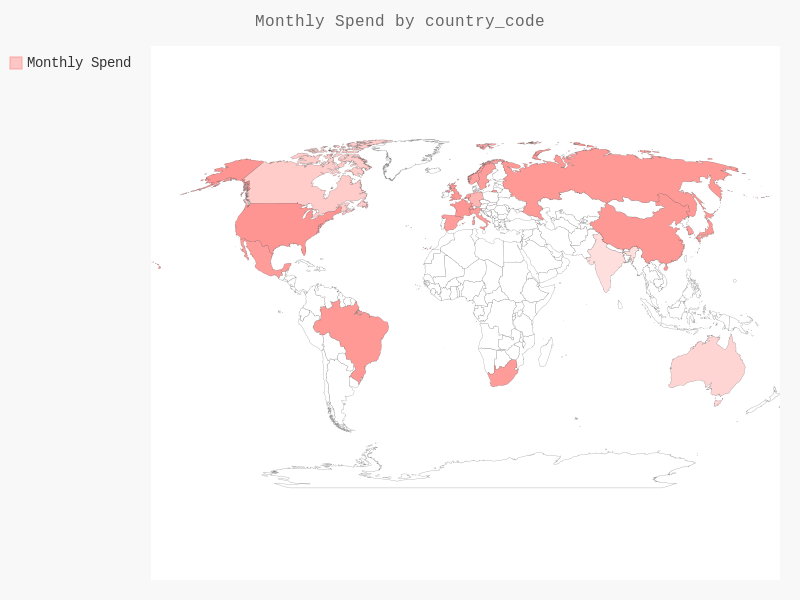

In [192]:
from pygal_maps_world.maps import World
import pygal
# Assuming you have already aggregated the data
aggregated_data = new_data.groupby('Country Code')['Monthly_Spending( USD)'].sum().reset_index()

# Convert the DataFrame to a dictionary
data_dict = dict(zip(aggregated_data['Country Code'], aggregated_data['Monthly_Spending( USD)']))

worldmap = World()
worldmap.style = pygal.style.LightColorizedStyle
# Add data to the map
worldmap.title = 'Monthly Spend by country_code'
worldmap.add('Monthly Spend', data_dict)



In [193]:
new_data['Avg_Salary'].isnull().sum()

16

In [194]:
new_data['Avg_Salary'].fillna(new_data['Avg_Salary'].mean(), inplace = True)

In [195]:
new_data['Avg_Salary'].isnull().sum()

0

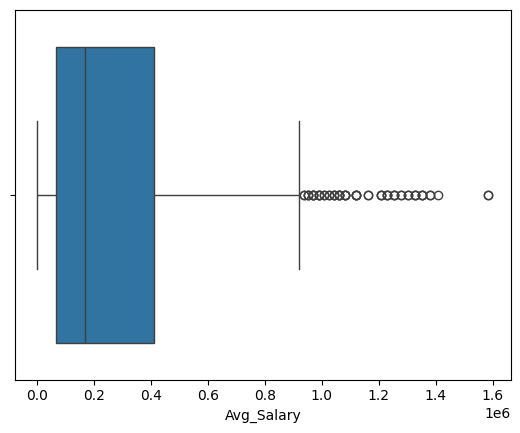

In [196]:
sns.boxplot(x = 'Avg_Salary',data = new_data)
plt.show()

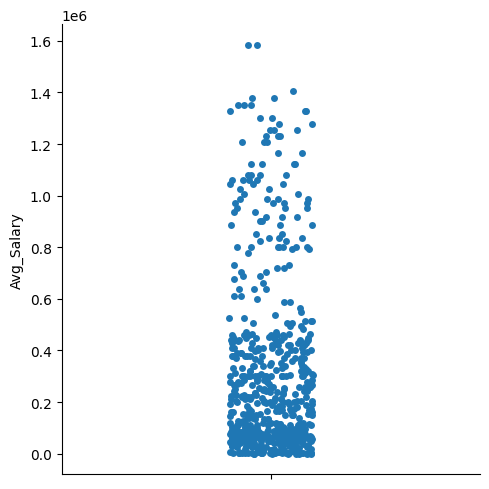

In [197]:
sns.catplot(new_data['Avg_Salary'])

In [198]:
new_data['Avg_Salary']

2      800000.000000
3       75000.000000
4      300271.254908
5       80000.000000
13      40000.000000
           ...      
963     68269.230769
965     67445.054945
968     66208.791209
972     64560.439560
973     64148.351648
Name: Avg_Salary, Length: 641, dtype: float64

In [199]:
'''#checking outliers using ZScore
outliers = []
def defect_outliers(D):
  threshold = 3
  mean = np.mean(new_data['Avg_Salary'])
  std = np.mean(new_data['Avg_Salary'])
  for i in D:
    z_score = (i-mean)/std
    if np.abs(z_score)>threshold:
      return outliers.append(i)
  return outliers'''

"#checking outliers using ZScore\noutliers = []\ndef defect_outliers(D):\n  threshold = 3\n  mean = np.mean(new_data['Avg_Salary'])\n  std = np.mean(new_data['Avg_Salary'])\n  for i in D:\n    z_score = (i-mean)/std\n    if np.abs(z_score)>threshold:\n      return outliers.append(i)\n  return outliers"

In [200]:
'''outliers_point = defect_outliers(new_data['Avg_Salary'])
print(outliers_point)'''

"outliers_point = defect_outliers(new_data['Avg_Salary'])\nprint(outliers_point)"

In [201]:
'''#handling outliers by IQR
qq1 = np.quantile(new_data['Avg_Salary'],0.25)
qq3 = np.quantile(new_data['Avg_Salary'],0.75)
iqr = qq3-qq1
minn_range = qq1-(1.5*iqr)
maxx_range = qq3+(1.5*iqr)
minn_range,maxx_range'''

"#handling outliers by IQR\nqq1 = np.quantile(new_data['Avg_Salary'],0.25)\nqq3 = np.quantile(new_data['Avg_Salary'],0.75)\niqr = qq3-qq1\nminn_range = qq1-(1.5*iqr)\nmaxx_range = qq3+(1.5*iqr)\nminn_range,maxx_range"

In [202]:
'''new_data['Avg_Salary'].value_counts()'''

"new_data['Avg_Salary'].value_counts()"

In [203]:
new_data

,ID,Name,Avg_Salary,Address,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code
2,3,Michael,800000.000000,"789, TX",410,s,Phd,M,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,1972,in
3,4,Emily,75000.000000,"101, FL",201,l,Master's,F,Teacher,emily@gmail.com,B-,50 Lakh,400+,No,Instagram,1990,au
4,5,Williams,300271.254908,"202, WA",521,xl,Master's,F,Businessman,david@gmail.com,O+,10000,0,No,Instagram,1987,de
5,6,Sarah,80000.000000,"303, AZ",412,xxl,Bachelor's,M,Nurse,Sarah@gmail.com,A-,25 Lakh,410,No,Instagram,1985,ca
13,14,Sophia,40000.000000,"1111, MH",220,xs,High School,M,Scientist,sophia@gmail.com,A+,10 Lakh,10000,Yes,Instagram,1973,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,964,Smith,68269.230769,"808, GJ",377,l,Master's,M,Engineer,will@gmail.com,AB+,9.7 Crore,785,No,Whatsapp,1986,au
965,966,Padukone,67445.054945,"919, NL",374,xxl,High School,F,IT Professional,deepika@gmail.com,B-,6.3 Crore,985,No,Facebook,1993,ca
968,969,khanna,66208.791209,"434, NB",432,s,Bachelor's,F,Research Assiatnt,kajol@gmail.com,AB+,4.8 Lakh,395,Yes,FaceBook,1992,in
972,973,Robert,64560.439560,"878, SK",370,m,Bachelor's,M,Engineer,robert@gmail.coM,O+,6.7 Lakh,795,Yes,Whatsapp,1976,in


In [204]:
new_data.shape

(641, 17)

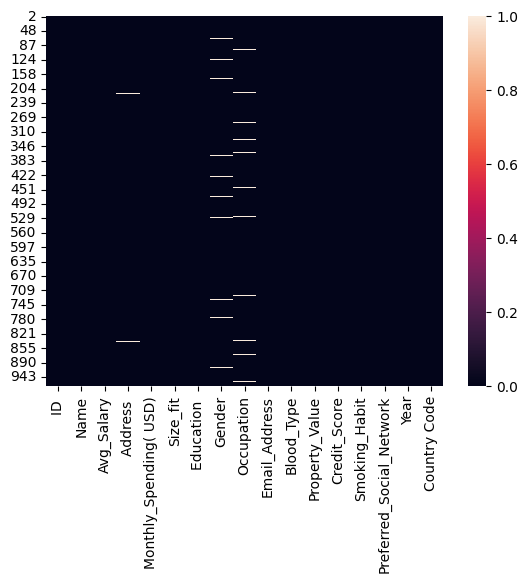

In [205]:
sns.heatmap(new_data.isnull())
plt.show()

In [206]:
new_data.head(5)

,ID,Name,Avg_Salary,Address,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code
2,3,Michael,800000.000000,"789, TX",410,s,Phd,M,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,1972,in
3,4,Emily,75000.000000,"101, FL",201,l,Master's,F,Teacher,emily@gmail.com,B-,50 Lakh,400+,No,Instagram,1990,au
4,5,Williams,300271.254908,"202, WA",521,xl,Master's,F,Businessman,david@gmail.com,O+,10000,0,No,Instagram,1987,de
5,6,Sarah,80000.000000,"303, AZ",412,xxl,Bachelor's,M,Nurse,Sarah@gmail.com,A-,25 Lakh,410,No,Instagram,1985,ca
13,14,Sophia,40000.000000,"1111, MH",220,xs,High School,M,Scientist,sophia@gmail.com,A+,10 Lakh,10000,Yes,Instagram,1973,in


In [207]:
new_data['Avg_Salary'] = new_data['Avg_Salary'].astype('int64')

In [208]:
new_data.head(5)

,ID,Name,Avg_Salary,Address,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code
2,3,Michael,800000,"789, TX",410,s,Phd,M,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,1972,in
3,4,Emily,75000,"101, FL",201,l,Master's,F,Teacher,emily@gmail.com,B-,50 Lakh,400+,No,Instagram,1990,au
4,5,Williams,300271,"202, WA",521,xl,Master's,F,Businessman,david@gmail.com,O+,10000,0,No,Instagram,1987,de
5,6,Sarah,80000,"303, AZ",412,xxl,Bachelor's,M,Nurse,Sarah@gmail.com,A-,25 Lakh,410,No,Instagram,1985,ca
13,14,Sophia,40000,"1111, MH",220,xs,High School,M,Scientist,sophia@gmail.com,A+,10 Lakh,10000,Yes,Instagram,1973,in


COLUMN 5 - ADDRESS

In [209]:
new_data.columns

Index(['ID ', 'Name', 'Avg_Salary', 'Address ', 'Monthly_Spending( USD)',
       'Size_fit', 'Education ', 'Gender', 'Occupation', 'Email_Address',
       'Blood_Type', 'Property_Value', 'Credit_Score', 'Smoking_Habit',
       'Preferred_Social_Network', 'Year', 'Country Code'],
      dtype='object')

In [210]:
new_data = new_data.rename(columns={'Address ': 'Address'})

In [211]:
splittt = new_data['Address'].str.split(",",expand = True)
new_data['Houseno.'] = splittt[0]
new_data['State'] = splittt[1]
new_data.drop(columns = ['Address'], inplace = True)

In [212]:
new_data

,ID,Name,Avg_Salary,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code,Houseno.,State
2,3,Michael,800000,410,s,Phd,M,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,1972,in,789,TX
3,4,Emily,75000,201,l,Master's,F,Teacher,emily@gmail.com,B-,50 Lakh,400+,No,Instagram,1990,au,101,FL
4,5,Williams,300271,521,xl,Master's,F,Businessman,david@gmail.com,O+,10000,0,No,Instagram,1987,de,202,WA
5,6,Sarah,80000,412,xxl,Bachelor's,M,Nurse,Sarah@gmail.com,A-,25 Lakh,410,No,Instagram,1985,ca,303,AZ
13,14,Sophia,40000,220,xs,High School,M,Scientist,sophia@gmail.com,A+,10 Lakh,10000,Yes,Instagram,1973,in,1111,MH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,964,Smith,68269,377,l,Master's,M,Engineer,will@gmail.com,AB+,9.7 Crore,785,No,Whatsapp,1986,au,808,GJ
965,966,Padukone,67445,374,xxl,High School,F,IT Professional,deepika@gmail.com,B-,6.3 Crore,985,No,Facebook,1993,ca,919,NL
968,969,khanna,66208,432,s,Bachelor's,F,Research Assiatnt,kajol@gmail.com,AB+,4.8 Lakh,395,Yes,FaceBook,1992,in,434,NB
972,973,Robert,64560,370,m,Bachelor's,M,Engineer,robert@gmail.coM,O+,6.7 Lakh,795,Yes,Whatsapp,1976,in,878,SK


In [213]:
new_data['Country Code'] = new_data['Country Code'].str.upper()

In [214]:
new_data.columns

Index(['ID ', 'Name', 'Avg_Salary', 'Monthly_Spending( USD)', 'Size_fit',
       'Education ', 'Gender', 'Occupation', 'Email_Address', 'Blood_Type',
       'Property_Value', 'Credit_Score', 'Smoking_Habit',
       'Preferred_Social_Network', 'Year', 'Country Code', 'Houseno.',
       'State'],
      dtype='object')

In [215]:
new_data = new_data.rename(columns={'Education ': 'Education'})
new_data['Education'] = new_data['Education'].str.replace("'s",'')

In [216]:
new_data.head(5)

,ID,Name,Avg_Salary,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code,Houseno.,State
2,3,Michael,800000,410,s,Phd,M,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,1972,IN,789,TX
3,4,Emily,75000,201,l,Master,F,Teacher,emily@gmail.com,B-,50 Lakh,400+,No,Instagram,1990,AU,101,FL
4,5,Williams,300271,521,xl,Master,F,Businessman,david@gmail.com,O+,10000,0,No,Instagram,1987,DE,202,WA
5,6,Sarah,80000,412,xxl,Bachelor,M,Nurse,Sarah@gmail.com,A-,25 Lakh,410,No,Instagram,1985,CA,303,AZ
13,14,Sophia,40000,220,xs,High School,M,Scientist,sophia@gmail.com,A+,10 Lakh,10000,Yes,Instagram,1973,IN,1111,MH


In [217]:
new_data['Education'].isnull().sum()

0

Handling Encoding - Label Encoding, Ordinal Encoding and OneHot Encoding

In [218]:
from sklearn.preprocessing import LabelEncoder

In [219]:
le = LabelEncoder()
new_data['Gender'] = le.fit_transform(new_data['Gender'])
new_data.head(5)

,ID,Name,Avg_Salary,Monthly_Spending( USD),Size_fit,Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code,Houseno.,State
2,3,Michael,800000,410,s,Phd,1,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,1972,IN,789,TX
3,4,Emily,75000,201,l,Master,0,Teacher,emily@gmail.com,B-,50 Lakh,400+,No,Instagram,1990,AU,101,FL
4,5,Williams,300271,521,xl,Master,0,Businessman,david@gmail.com,O+,10000,0,No,Instagram,1987,DE,202,WA
5,6,Sarah,80000,412,xxl,Bachelor,1,Nurse,Sarah@gmail.com,A-,25 Lakh,410,No,Instagram,1985,CA,303,AZ
13,14,Sophia,40000,220,xs,High School,1,Scientist,sophia@gmail.com,A+,10 Lakh,10000,Yes,Instagram,1973,IN,1111,MH


In [220]:
order = [['xs','s','m','l','xl','xxl']]

In [221]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=order)
new_data['Size'] = oe.fit_transform(new_data[['Size_fit']])

In [222]:
new_data['Size'].astype('int64')


2      1
3      3
4      4
5      5
13     0
      ..
963    3
965    5
968    1
972    2
973    0
Name: Size, Length: 641, dtype: int64

In [223]:
new_data.drop(columns = ['Size_fit'],inplace = True)

In [224]:
order_1 = [['Marticulate','High School','Bachelor','Master','Phd']]

In [225]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=order_1)
new_data['Education'] = oe.fit_transform(new_data[['Education']])

In [226]:
new_data['Education'] = new_data['Education'].astype('int64')

In [227]:
new_data.head(5)

,ID,Name,Avg_Salary,Monthly_Spending( USD),Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code,Houseno.,State,Size
2,3,Michael,800000,410,4,1,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,1972,IN,789,TX,1.0
3,4,Emily,75000,201,3,0,Teacher,emily@gmail.com,B-,50 Lakh,400+,No,Instagram,1990,AU,101,FL,3.0
4,5,Williams,300271,521,3,0,Businessman,david@gmail.com,O+,10000,0,No,Instagram,1987,DE,202,WA,4.0
5,6,Sarah,80000,412,2,1,Nurse,Sarah@gmail.com,A-,25 Lakh,410,No,Instagram,1985,CA,303,AZ,5.0
13,14,Sophia,40000,220,1,1,Scientist,sophia@gmail.com,A+,10 Lakh,10000,Yes,Instagram,1973,IN,1111,MH,0.0


In [228]:
new_data.shape

(641, 18)


Seaborn is a popular data visualization library in Python, which provides a variety of high-level functions to create attractive and informative statistical graphics. Here are the names of some commonly used Seaborn charts:

Relational Plots:

sns.scatterplot: Scatter plot.

sns.lineplot: Line plot.

sns.relplot: Relational plot for exploring the relationship between two variables.

sns.jointplot: Joint plot showing the relationship between two variables along with their individual distributions.

Distribution Plots:

sns.histplot: Histogram.

sns.kdeplot: Kernel Density Estimate (KDE) plot.

sns.distplot: Distribution plot (deprecated, replaced by sns.histplot and sns.kdeplot).

Categorical Plots:

sns.barplot: Bar plot.

sns.countplot: Count plot.

sns.boxplot: Box plot.

sns.violinplot: Violin plot.

sns.swarmplot: Swarm plot.

Matrix Plots:

sns.heatmap: Heatmap.

sns.clustermap: Clustered heatmap.

Regression Plots:

sns.lmplot: Linear regression plot.

sns.regplot: Regression plot.

sns.residplot: Residual plot.

Multi-plot Grids:

sns.FacetGrid: Facet grid for plotting conditional relationships.

sns.PairGrid: Pair grid for plotting pairwise relationships.

Categorical Estimation Plots:

sns.catplot: Categorical plot to show the relationship between numerical and one or more categorical variables.

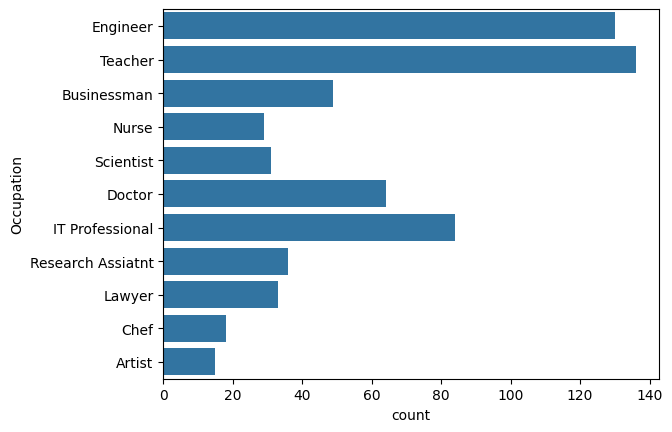

In [229]:
sns.countplot(new_data['Occupation'])
plt.show()

In [230]:
new_data['Occupation'].isnull().sum()

16

In [231]:
new_data['Occupation'] = new_data['Occupation'].fillna('Self_Employed')

In [232]:
new_data['Occupation'].isnull().sum()

0

In [233]:
x  = new_data.duplicated()
if x.any():
  print(x)
else:
  pass

In [234]:
new_data['Email_Address'] = new_data['Email_Address'].str.lower()

In [235]:
new_data['Email_Address']

2       michael@gmail.com
3         emily@gmail.com
4         david@gmail.com
5         sarah@gmail.com
13       sophia@gmail.com
              ...        
963        will@gmail.com
965     deepika@gmail.com
968       kajol@gmail.com
972      robert@gmail.com
973    jennifer@gmail.com
Name: Email_Address, Length: 641, dtype: object

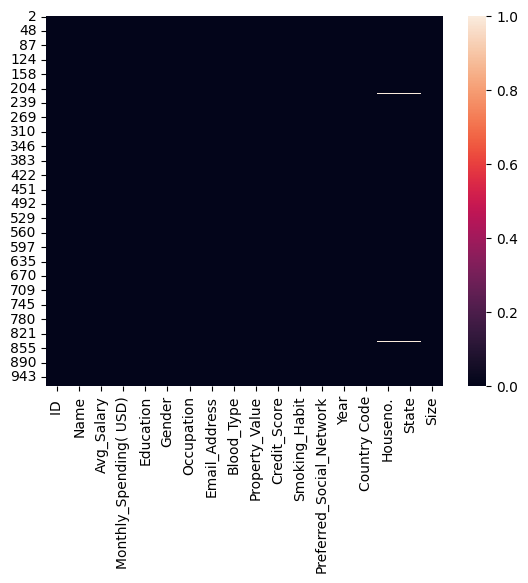

In [236]:
sns.heatmap(new_data.isnull())
plt.show()

In [237]:
new_data['Houseno.'].isnull().sum().sum()

5

In [238]:
new_data.dropna(subset =  ['Houseno.','State'], inplace = True)

In [239]:
new_data.shape

(636, 18)

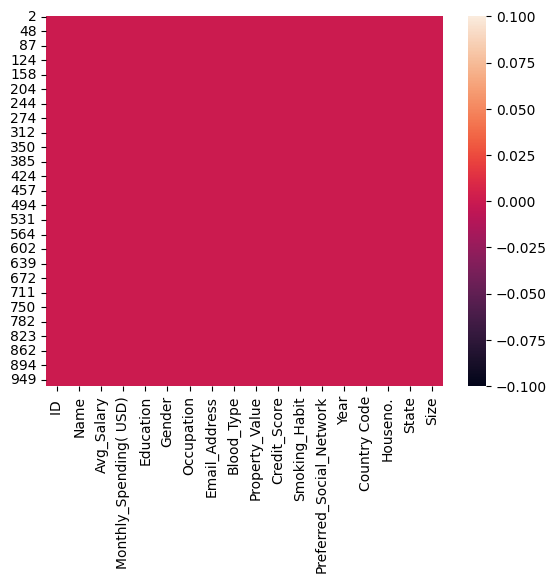

In [240]:
sns.heatmap(new_data.isnull())
plt.show()

In [241]:
new_data['Credit_Score'] = new_data['Credit_Score'].replace('400+','400')
new_data['Credit_Score'] = new_data['Credit_Score'].replace('600+','600')
new_data['Credit_Score'] = new_data['Credit_Score'].replace('675+','675')

In [242]:
new_data['Credit_Score']

2        500
3        400
4          0
5        410
13     10000
       ...  
963      785
965      985
968      395
972      795
973      895
Name: Credit_Score, Length: 636, dtype: object

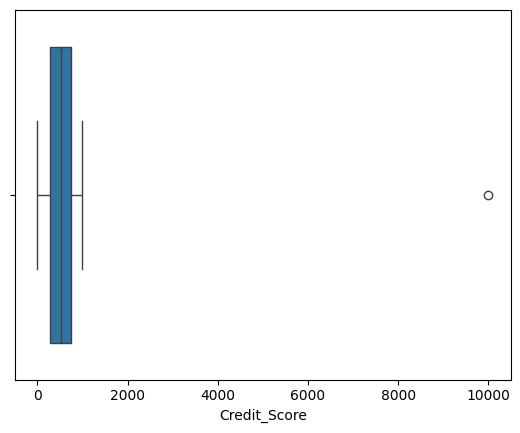

In [243]:
sns.boxplot(x = 'Credit_Score',data = new_data)
plt.show()

In [244]:
new_data.head(5)

,ID,Name,Avg_Salary,Monthly_Spending( USD),Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code,Houseno.,State,Size
2,3,Michael,800000,410,4,1,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,1972,IN,789,TX,1.0
3,4,Emily,75000,201,3,0,Teacher,emily@gmail.com,B-,50 Lakh,400,No,Instagram,1990,AU,101,FL,3.0
4,5,Williams,300271,521,3,0,Businessman,david@gmail.com,O+,10000,0,No,Instagram,1987,DE,202,WA,4.0
5,6,Sarah,80000,412,2,1,Nurse,sarah@gmail.com,A-,25 Lakh,410,No,Instagram,1985,CA,303,AZ,5.0
13,14,Sophia,40000,220,1,1,Scientist,sophia@gmail.com,A+,10 Lakh,10000,Yes,Instagram,1973,IN,1111,MH,0.0


In [245]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Dataaaa = np.array(new_data['Credit_Score']).reshape(-1,1)

In [246]:
ss.fit(Dataaaa)

StandardScaler()

In [247]:
ss.transform(Dataaaa)

array([[-5.91599333e-02],
       [-2.73100444e-01],
       [-1.12886249e+00],
       [-2.51706393e-01],
       [ 2.02651886e+01],
       [-6.98842060e-01],
       [-6.98842060e-01],
       [-1.12886249e+00],
       [-8.07951720e-01],
       [-2.51706393e-01],
       [-7.00981465e-01],
       [-1.66130189e-01],
       [ 4.78103220e-02],
       [ 2.61750832e-01],
       [ 4.75691343e-01],
       [ 6.89631854e-01],
       [ 9.03572364e-01],
       [-1.02189223e+00],
       [-8.07951720e-01],
       [-5.94011210e-01],
       [-3.80070699e-01],
       [-1.66130189e-01],
       [ 4.78103220e-02],
       [ 2.61750832e-01],
       [ 4.75691343e-01],
       [ 6.89631854e-01],
       [ 9.03572364e-01],
       [-4.87040954e-01],
       [-2.73100444e-01],
       [-5.91599333e-02],
       [ 1.54780577e-01],
       [ 7.96602109e-01],
       [-1.12886249e+00],
       [-3.80070699e-01],
       [-1.66130189e-01],
       [ 2.61750832e-01],
       [ 9.03572364e-01],
       [-9.14921975e-01],
       [-5.9

In [248]:
new_data['Credit_Score_ss'] = ss.transform(Dataaaa)

In [249]:
new_data.head(5)

,ID,Name,Avg_Salary,Monthly_Spending( USD),Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code,Houseno.,State,Size,Credit_Score_ss
2,3,Michael,800000,410,4,1,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,1972,IN,789,TX,1.0,-0.059160
3,4,Emily,75000,201,3,0,Teacher,emily@gmail.com,B-,50 Lakh,400,No,Instagram,1990,AU,101,FL,3.0,-0.273100
4,5,Williams,300271,521,3,0,Businessman,david@gmail.com,O+,10000,0,No,Instagram,1987,DE,202,WA,4.0,-1.128862
5,6,Sarah,80000,412,2,1,Nurse,sarah@gmail.com,A-,25 Lakh,410,No,Instagram,1985,CA,303,AZ,5.0,-0.251706
13,14,Sophia,40000,220,1,1,Scientist,sophia@gmail.com,A+,10 Lakh,10000,Yes,Instagram,1973,IN,1111,MH,0.0,20.265189


<ipython-input-250-1d314d076b2c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Credit_Score'])
<ipython-input-250-1d314d076b2c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Credit_Score_ss'])


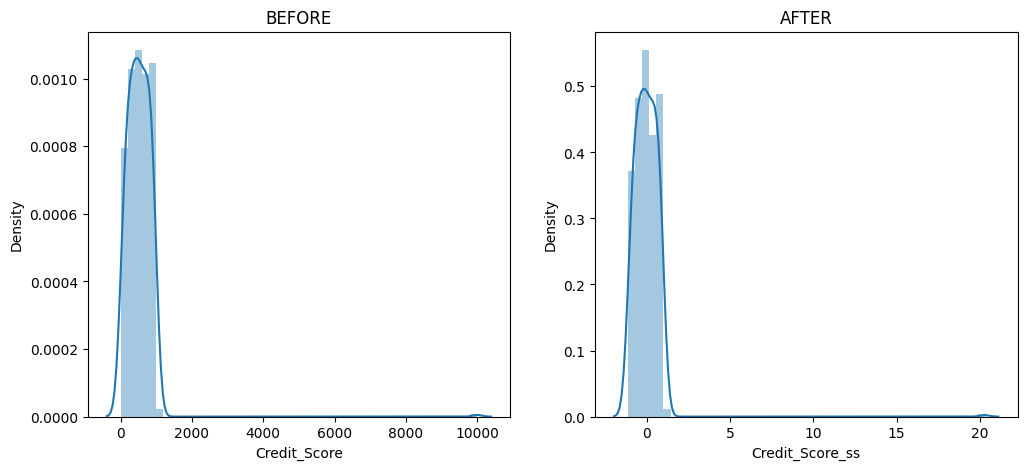

In [250]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("BEFORE")
sns.distplot(new_data['Credit_Score'])


plt.subplot(1,2,2)
plt.title("AFTER")
sns.distplot(new_data['Credit_Score_ss'])

plt.show()

S.NO. Normalization Standardization

Minimum and maximum value of features are used for scaling Mean and standard deviation is used for scaling.

It is used when features are of different scales. It is used when we want to ensure zero mean and unit standard deviation.

Scales values between [0, 1] or [-1, 1]. It is not bounded to a certain range.

It is really affected by outliers. It is much less affected by outliers.

Scikit-Learn provides a transformer called MinMaxScaler for Normalization.
Scikit-Learn provides a transformer called StandardScaler for standardization.

This transformation squishes the n-dimensional data into an n-dimensional unit hypercube. It translates the data to the mean vector of original data to the origin and squishes or expands.

It is useful when we don’t know about the distribution It is useful when the feature distribution is Normal or Gaussian.

It is a often called as Scaling Normalization It is a often called as Z-Score Normalization.

In [251]:
new_data.shape

(636, 19)

In [252]:
new_data

,ID,Name,Avg_Salary,Monthly_Spending( USD),Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code,Houseno.,State,Size,Credit_Score_ss
2,3,Michael,800000,410,4,1,Engineer,michael@gmail.com,AB+,10 Crore,500,Yes,FaceBook,1972,IN,789,TX,1.0,-0.059160
3,4,Emily,75000,201,3,0,Teacher,emily@gmail.com,B-,50 Lakh,400,No,Instagram,1990,AU,101,FL,3.0,-0.273100
4,5,Williams,300271,521,3,0,Businessman,david@gmail.com,O+,10000,0,No,Instagram,1987,DE,202,WA,4.0,-1.128862
5,6,Sarah,80000,412,2,1,Nurse,sarah@gmail.com,A-,25 Lakh,410,No,Instagram,1985,CA,303,AZ,5.0,-0.251706
13,14,Sophia,40000,220,1,1,Scientist,sophia@gmail.com,A+,10 Lakh,10000,Yes,Instagram,1973,IN,1111,MH,0.0,20.265189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,964,Smith,68269,377,3,1,Engineer,will@gmail.com,AB+,9.7 Crore,785,No,Whatsapp,1986,AU,808,GJ,3.0,0.550571
965,966,Padukone,67445,374,1,0,IT Professional,deepika@gmail.com,B-,6.3 Crore,985,No,Facebook,1993,CA,919,NL,5.0,0.978452
968,969,khanna,66208,432,2,0,Research Assiatnt,kajol@gmail.com,AB+,4.8 Lakh,395,Yes,FaceBook,1992,IN,434,NB,1.0,-0.283797
972,973,Robert,64560,370,2,1,Engineer,robert@gmail.com,O+,6.7 Lakh,795,Yes,Whatsapp,1976,IN,878,SK,2.0,0.571965


In [253]:
from sklearn.preprocessing import LabelEncoder
llee = LabelEncoder()
new_data['Smoking_Habit'] = llee.fit_transform(new_data['Smoking_Habit'] )
new_data

,ID,Name,Avg_Salary,Monthly_Spending( USD),Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code,Houseno.,State,Size,Credit_Score_ss
2,3,Michael,800000,410,4,1,Engineer,michael@gmail.com,AB+,10 Crore,500,2,FaceBook,1972,IN,789,TX,1.0,-0.059160
3,4,Emily,75000,201,3,0,Teacher,emily@gmail.com,B-,50 Lakh,400,0,Instagram,1990,AU,101,FL,3.0,-0.273100
4,5,Williams,300271,521,3,0,Businessman,david@gmail.com,O+,10000,0,0,Instagram,1987,DE,202,WA,4.0,-1.128862
5,6,Sarah,80000,412,2,1,Nurse,sarah@gmail.com,A-,25 Lakh,410,0,Instagram,1985,CA,303,AZ,5.0,-0.251706
13,14,Sophia,40000,220,1,1,Scientist,sophia@gmail.com,A+,10 Lakh,10000,2,Instagram,1973,IN,1111,MH,0.0,20.265189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,964,Smith,68269,377,3,1,Engineer,will@gmail.com,AB+,9.7 Crore,785,0,Whatsapp,1986,AU,808,GJ,3.0,0.550571
965,966,Padukone,67445,374,1,0,IT Professional,deepika@gmail.com,B-,6.3 Crore,985,0,Facebook,1993,CA,919,NL,5.0,0.978452
968,969,khanna,66208,432,2,0,Research Assiatnt,kajol@gmail.com,AB+,4.8 Lakh,395,2,FaceBook,1992,IN,434,NB,1.0,-0.283797
972,973,Robert,64560,370,2,1,Engineer,robert@gmail.com,O+,6.7 Lakh,795,2,Whatsapp,1976,IN,878,SK,2.0,0.571965


In [254]:
new_data.columns

Index(['ID ', 'Name', 'Avg_Salary', 'Monthly_Spending( USD)', 'Education',
       'Gender', 'Occupation', 'Email_Address', 'Blood_Type', 'Property_Value',
       'Credit_Score', 'Smoking_Habit', 'Preferred_Social_Network', 'Year',
       'Country Code', 'Houseno.', 'State', 'Size', 'Credit_Score_ss'],
      dtype='object')

In [255]:
new_data['Property_Value']

2       10 Crore
3        50 Lakh
4          10000
5        25 Lakh
13       10 Lakh
         ...    
963    9.7 Crore
965    6.3 Crore
968     4.8 Lakh
972     6.7 Lakh
973    1.5 Crore
Name: Property_Value, Length: 636, dtype: object

In [256]:
x = new_data['Property_Value'][2]

In [257]:
new_data['Property_Value'].info()

<class 'pandas.core.series.Series'>
Int64Index: 636 entries, 2 to 973
Series name: Property_Value
Non-Null Count  Dtype 
--------------  ----- 
636 non-null    object
dtypes: object(1)
memory usage: 26.1+ KB


In [258]:
def rupee_change(x):
    if isinstance(x, str):  # Check if x is a string
        p = x.split(' ')
        try:
            if p[1] == 'Lakh':
                return str(round(float(p[0]) * 100000))
            elif p[1] == 'Crore':
                return str(round(float(p[0]) * 10000000))
            else:
                return x
        except IndexError:
            return x
    else:  # If x is not a string, return it unchanged
        return x

In [259]:
new_data['Property_Value'] = new_data['Property_Value'].apply(rupee_change)

In [260]:
new_data['Property_Value']

2      100000000
3        5000000
4          10000
5        2500000
13       1000000
         ...    
963     97000000
965     63000000
968       480000
972       670000
973     15000000
Name: Property_Value, Length: 636, dtype: object

In [261]:
new_data.head(5)

,ID,Name,Avg_Salary,Monthly_Spending( USD),Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code,Houseno.,State,Size,Credit_Score_ss
2,3,Michael,800000,410,4,1,Engineer,michael@gmail.com,AB+,100000000,500,2,FaceBook,1972,IN,789,TX,1.0,-0.059160
3,4,Emily,75000,201,3,0,Teacher,emily@gmail.com,B-,5000000,400,0,Instagram,1990,AU,101,FL,3.0,-0.273100
4,5,Williams,300271,521,3,0,Businessman,david@gmail.com,O+,10000,0,0,Instagram,1987,DE,202,WA,4.0,-1.128862
5,6,Sarah,80000,412,2,1,Nurse,sarah@gmail.com,A-,2500000,410,0,Instagram,1985,CA,303,AZ,5.0,-0.251706
13,14,Sophia,40000,220,1,1,Scientist,sophia@gmail.com,A+,1000000,10000,2,Instagram,1973,IN,1111,MH,0.0,20.265189


In [262]:
# Reset the index of the DataFrame starting from 1
new_data.reset_index(drop=True, inplace=True)


In [263]:
new_data

,ID,Name,Avg_Salary,Monthly_Spending( USD),Education,Gender,Occupation,Email_Address,Blood_Type,Property_Value,Credit_Score,Smoking_Habit,Preferred_Social_Network,Year,Country Code,Houseno.,State,Size,Credit_Score_ss
0,3,Michael,800000,410,4,1,Engineer,michael@gmail.com,AB+,100000000,500,2,FaceBook,1972,IN,789,TX,1.0,-0.059160
1,4,Emily,75000,201,3,0,Teacher,emily@gmail.com,B-,5000000,400,0,Instagram,1990,AU,101,FL,3.0,-0.273100
2,5,Williams,300271,521,3,0,Businessman,david@gmail.com,O+,10000,0,0,Instagram,1987,DE,202,WA,4.0,-1.128862
3,6,Sarah,80000,412,2,1,Nurse,sarah@gmail.com,A-,2500000,410,0,Instagram,1985,CA,303,AZ,5.0,-0.251706
4,14,Sophia,40000,220,1,1,Scientist,sophia@gmail.com,A+,1000000,10000,2,Instagram,1973,IN,1111,MH,0.0,20.265189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,964,Smith,68269,377,3,1,Engineer,will@gmail.com,AB+,97000000,785,0,Whatsapp,1986,AU,808,GJ,3.0,0.550571
632,966,Padukone,67445,374,1,0,IT Professional,deepika@gmail.com,B-,63000000,985,0,Facebook,1993,CA,919,NL,5.0,0.978452
633,969,khanna,66208,432,2,0,Research Assiatnt,kajol@gmail.com,AB+,480000,395,2,FaceBook,1992,IN,434,NB,1.0,-0.283797
634,973,Robert,64560,370,2,1,Engineer,robert@gmail.com,O+,670000,795,2,Whatsapp,1976,IN,878,SK,2.0,0.571965


NOW DATA IS ALMOST CLEANED WE WILL SOLVE DATA ANALYSIS QUESTIONS!!!!!!!

These questions cover a range of aspects within the dataset, exploring relationships, distributions, and trends that can provide valuable insights for analysis.

In [264]:
#What is the average salary of the individuals in the dataset?
round(new_data['Avg_Salary'].mean(),1)

296634.2

In [265]:
#What is the distribution of nationalities among the individuals?
new_data['Country Code'].value_counts()

CA    94
IN    91
IT    79
AU    73
DE    38
ZA    32
FR    21
JP    21
CN    20
RU    20
GB    20
US    20
BR    19
MX    15
ES    15
NL    12
SE    12
KR    12
CH    11
NO    11
Name: Country Code, dtype: int64

In [266]:
new_data['Monthly_Spending( USD)']

0      410
1      201
2      521
3      412
4      220
      ... 
631    377
632    374
633    432
634    370
635    369
Name: Monthly_Spending( USD), Length: 636, dtype: int64

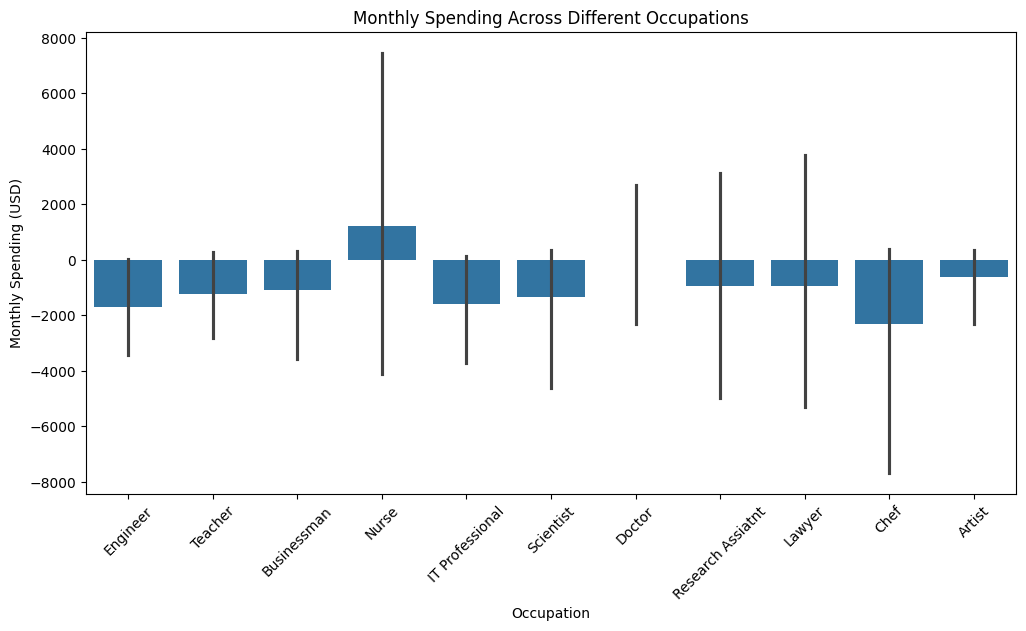

In [267]:
#How does monthly spending vary across different occupations?
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Occupation', y='Monthly_Spending( USD)')
plt.title('Monthly Spending Across Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Monthly Spending (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [268]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        636 non-null    int64  
 1   Name                      636 non-null    object 
 2   Avg_Salary                636 non-null    int64  
 3   Monthly_Spending( USD)    636 non-null    int64  
 4   Education                 636 non-null    int64  
 5   Gender                    636 non-null    int64  
 6   Occupation                636 non-null    object 
 7   Email_Address             636 non-null    object 
 8   Blood_Type                636 non-null    object 
 9   Property_Value            636 non-null    object 
 10  Credit_Score              636 non-null    object 
 11  Smoking_Habit             636 non-null    int64  
 12  Preferred_Social_Network  636 non-null    object 
 13  Year                      636 non-null    int64  
 14  Country Co

In [269]:
new_data['Property_Value'] = new_data['Property_Value'].astype('int64')

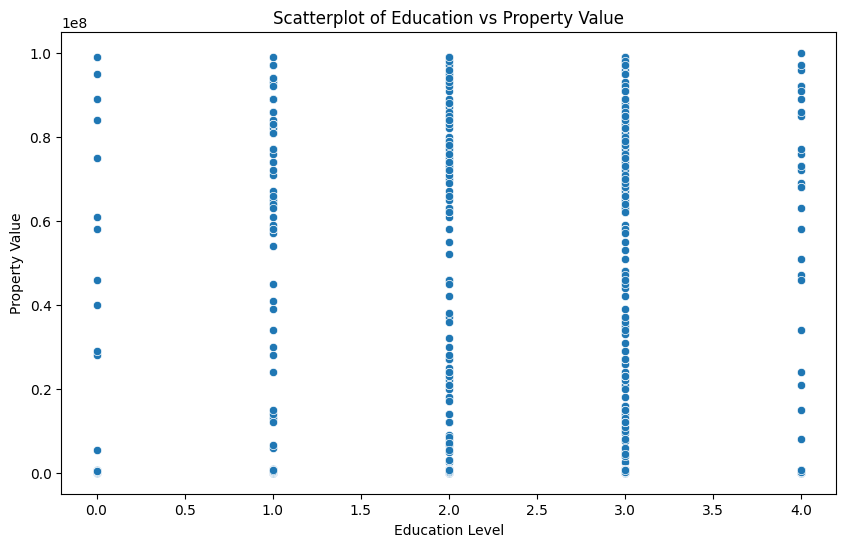

In [270]:
#Is there any correlation between education level and property value?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_data, x='Education', y='Property_Value')
plt.title('Scatterplot of Education vs Property Value')
plt.xlabel('Education Level')
plt.ylabel('Property Value')
plt.show()



In [271]:
new_data['Gender'].value_counts()

1    320
0    302
2     14
Name: Gender, dtype: int64

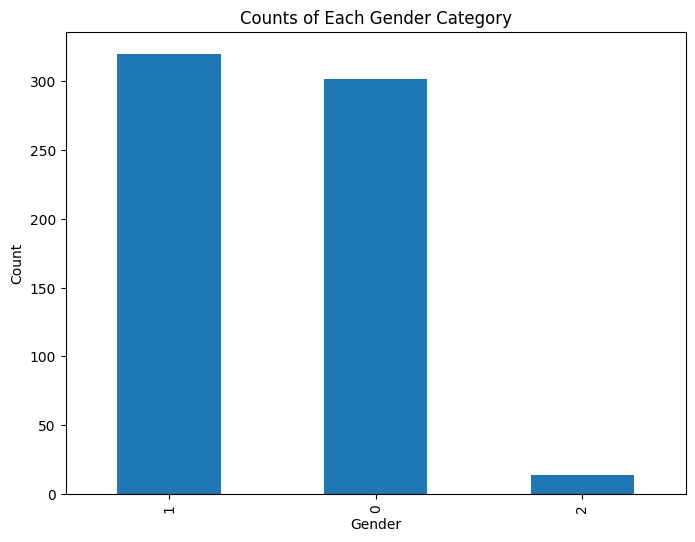

In [272]:
#What is the distribution of genders among the individuals?
import matplotlib.pyplot as plt

# Get the counts of each gender category
gender_counts = new_data['Gender'].value_counts()

# Plot the counts using a bar plot
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('Counts of Each Gender Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
